# Spatial Extent

Although other NSRDB datasets cover other parts of the globe, the primary PSM3 dataset, being derived in part from imagery from the GOES [East](https://en.wikipedia.org/wiki/GOES-16) and [West](https://en.wikipedia.org/wiki/GOES-17) satellites in geostationary orbit over North America, covers only a large portion of the western hemisphere.  Furthermore, PSM3 data are only available on or near land within that footprint.

This notebook documents that spatial availability.  To do so using the HTTP API would be prohibitively intensive, so we'll use the HSDS service instead.

In [1]:
import h5pyd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np
import pandas as pd

f = h5pyd.File("/nrel/nsrdb/v3/nsrdb_2020.h5", 'r')  # requires a ~/.hscfg file
print(f.attrs['version'])

3.2.0


In [2]:
%time meta = pd.DataFrame(f['meta'][...])

CPU times: user 2.21 s, sys: 837 ms, total: 3.05 s
Wall time: 58 s


,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
0,-19.990000,-175.259995,0.0,13,b'None',b'None',b'None',b'None',-9999,210
1,-19.990000,-175.220001,0.0,13,b'None',b'None',b'None',b'None',-9999,210
2,-19.990000,-175.179993,0.0,13,b'None',b'None',b'None',b'None',-9999,210
3,-19.990000,-175.139999,0.0,13,b'None',b'None',b'None',b'None',-9999,210
4,-19.990000,-175.100006,0.0,13,b'None',b'None',b'None',b'None',-9999,210
...,...,...,...,...,...,...,...,...,...,...
2018387,51.810001,179.860001,0.0,-10,b'None',b'None',b'None',b'None',-9999,210
2018388,51.849998,179.860001,0.0,-10,b'None',b'None',b'None',b'None',-9999,210
2018389,51.689999,179.860001,0.0,-10,b'None',b'None',b'None',b'None',-9999,210
2018390,51.770000,179.860001,0.0,-10,b'None',b'None',b'None',b'None',-9999,210


First, let's map what parts of the planet have data available:

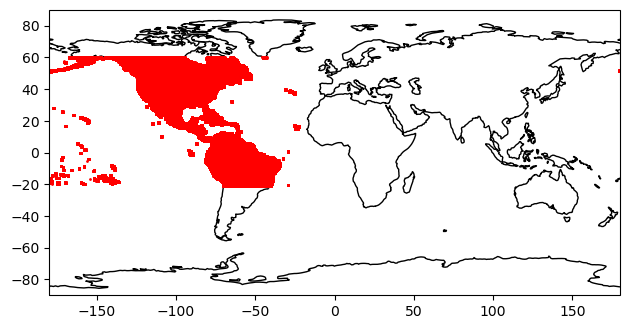

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.scatter(meta['longitude'], meta['latitude'], c='r', s=1, transform=ccrs.PlateCarree())
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
fig.tight_layout()

So there is data for much of the continental Americas as well as various islands in the Atlantic and Pacific.  Note also the tiny spec of coverage in the Aleutian Islands at the far right.  Ignoring that, the coverage spans $-21°$ to $+60°$ in latitude and $-180°$ to $-22.5°$ in longitude.

Zooming in, we see that the data coverage extends out from the coastline a ways -- roughly 5 pixels or so:

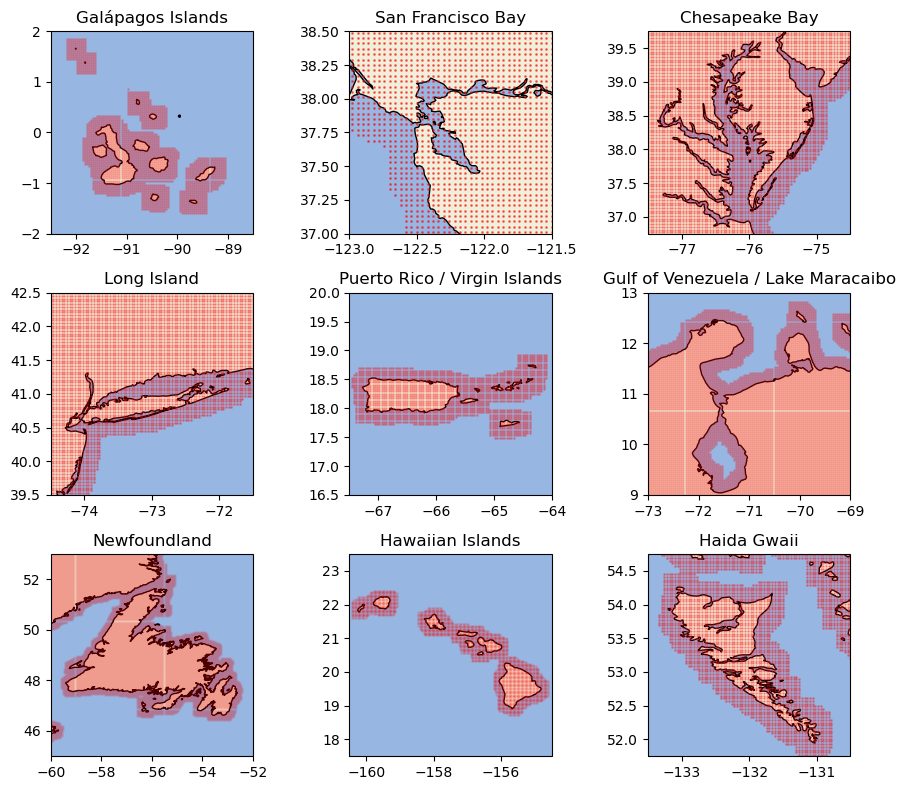

In [4]:
# bounding boxes (lon_min, lon_max, lat_min, lat_max)
extents = {
    'Galápagos Islands': ([-92.5, -88.5, -2, 2], 0.2),
    'San Francisco Bay': ([-123, -121.5, 37, 38.5], 0.5),
    'Chesapeake Bay': ([-77.5, -74.5, 36.75, 39.75], 0.3),
    'Long Island': ([-74.5, -71.5, 39.5, 42.5], 0.3),
    'Puerto Rico / Virgin Islands': ([-67.5, -64, 16.5, 20], 0.25),
    'Gulf of Venezuela / Lake Maracaibo': ([-73, -69, 9, 13], 0.2),
    'Newfoundland': ([-60, -52, 45, 53], 0.05),
    'Hawaiian Islands': ([-160.5, -154.5, 17.5, 23.5], 0.1),
    'Haida Gwaii': ([-133.5, -130.5, 51.75, 54.75], 0.3),
}

fig = plt.figure(figsize=(9, 8))
for i, (label, (extent, alpha)) in enumerate(extents.items()):
    ax = fig.add_subplot(3, 3, 1+i, projection=ccrs.PlateCarree())
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.OCEAN, zorder=0)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
    ax.scatter(meta['longitude'], meta['latitude'], c='r', s=1, transform=ccrs.PlateCarree(), alpha=alpha)
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
    ax.set_title(label)

fig.tight_layout()

Interestingly, inland bodies of water have full coverage:

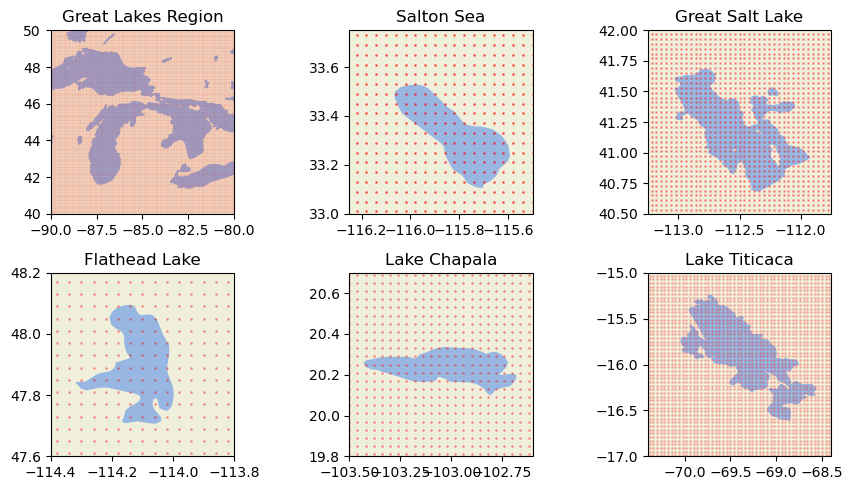

In [5]:
extents = {
    'Great Lakes Region': ([-90, -80, 40, 50], 0.01),
    'Salton Sea': ([-116.25, -115.5, 33, 33.75], 0.5),
    'Great Salt Lake': ([-113.25, -111.75, 40.5, 42], 0.3),
    'Flathead Lake': ([-114.4, -113.8, 47.6, 48.2], 0.3),
    'Lake Chapala': ([-103.5, -102.6, 19.8, 20.7], 0.3),
    'Lake Titicaca': ([-70.4, -68.4, -17, -15], 0.2),
}

fig = plt.figure(figsize=(9, 5))
for i, (label, (extent, alpha)) in enumerate(extents.items()):
    ax = fig.add_subplot(2, 3, 1+i, projection=ccrs.PlateCarree())
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.LAKES)
    ax.scatter(meta['longitude'], meta['latitude'], c='r', s=1, transform=ccrs.PlateCarree(), alpha=alpha)
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
    ax.set_title(label)

fig.tight_layout()

In [2]:
%load_ext watermark
%watermark --iversions -u -d -t

Last updated: 2022-09-21 18:07:33

